# Web Scraping Top Developers Analytics

TODO   (Intro):
- Introduction about web scrapping
- Introduction about Top developers.co and the problem statement
- Mention the tools you're using (Python, requests, Beautiful Soup, Pandas)

Here are the steps we'll follow:

- We are going to scrape https://www.topdevelopers.co/
- We'll get a list of companies. For each company, we'll get the company name, location, services offered, and client reviews.
- For each company, we'll create a CSV file in the following format:

    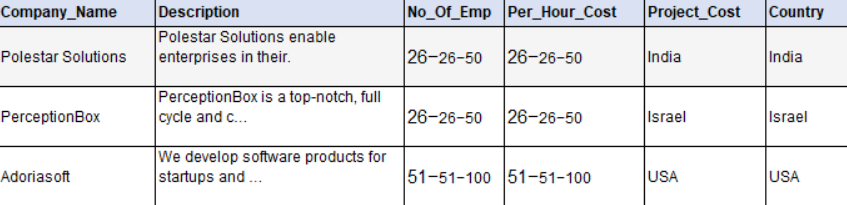

## Scrape the list of BIg Data Analysis companies from top developers.co

Explain how you'll do it

- Use requests to downlod the page
- User BS4 to parse and extract information
- convert to a Pandas dataframe

Let's write a code to download the page


In [1]:
import requests
from bs4 import BeautifulSoup

def get_company_page():
    url = "https://www.topdevelopers.co/directory/big-data-analytics-companies"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f'Failed to load page {url}')
    doc = BeautifulSoup(response.content, 'html.parser')
    doc1 = doc.find('div', class_="col-xl-12 col-lg-12 comp_listing list_holder")
    return doc, doc1  # Return both doc and doc1 as a tuple

# Now you can use the function to get the desired content
doc, doc1 = get_company_page()


Let's create some helper function to parse information from the page.

To get company name, we can pick "span" tags wtih the "class" 'itemprop= name'

![company info](https://i.imgur.com/iPsfNdh.png)

In [2]:
def get_company_name(doc1):
    item = doc1.find_all("span", itemprop="name")
    company_name = []
    for i in item:
        company_name.append(i.text.strip())
    return company_name

In [3]:
company_name = get_company_name(doc1)

In [4]:
company_name[:5]

['Polestar Solutions',
 'PerceptionBox',
 'Adoriasoft',
 'Emorphis Technologies',
 'ITRex Group']

## Similarly, we have defined functions for description, number of employees, per-cost, project cost, and country.

In [5]:
def get_descrition(doc1):
    descrp = doc1.find_all("span", itemprop="description")
    description = []
    for i in descrp:
        description.append(i.text.strip())
    return description

In [6]:
description = get_descrition(doc1)

In [7]:
description[:2]

['Polestar Solutions enable enterprises in their digital transformation journey by offering Consulting & Implementation Services related to Data, Analytics & Cloud Infrastructure. Our team comprises of BAs, Consultants, Project Managers and Delivery Heads with a Big-4 background. Our experts help you plan, execute and setup processes to accomplish the intended business outcomes. We have delivered…',
 'PerceptionBox is a top-notch, full cycle and client-focused development service provider. From full-service developments to a la carte services, we guide and help our clients to launch the most scalable digital products. We always act as your partner and safely guide you through the thorns of the world of technologies & software up to the skies of business success. With the astonishing design, amazing development, agile management and great quality assurance we do our best to skyrocket business of our partners with blazing custom software development…']

In [8]:
def get_no_of_emp(doc):
    emp1 = doc.find_all("div",class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")    
    no_of_emp = []
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            no_of_emp.append(p_tage[0].text.strip())
    return no_of_emp

In [9]:
no_of_emp = get_no_of_emp(doc)

In [10]:
no_of_emp[:5]

['51 to 250', '51 to 250', '11 to 50', '51 to 250', '251 to 1000']

In [11]:
def get_per_hour_cost(doc):
    
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")
    per_hour_cost = []
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            per_hour_cost.append(p_tage[1].text.strip())
    return per_hour_cost

In [12]:
per_hour_cost = get_per_hour_cost(doc)

In [13]:
per_hour_cost[:5]

['$26 - $50', '$26 - $50', '$51 - $100', '$26 - $50', '$26 - $50']

In [14]:
def get_project_cost(doc):
    
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")
    project_cost = []
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            project_cost.append(p_tage[2].text.strip())
    return project_cost

In [15]:
project_cost = get_project_cost(doc)

In [16]:
project_cost[:5]

['$10001 - $25000',
 '$10001 - $25000',
 '$10001 - $25000',
 'Less than - $5000',
 '$50001 - $100000']

In [17]:
def get_country(doc):
    
    country = []
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            country.append(p_tage[3].text.strip())
    return country

In [18]:
country = get_country(doc)

In [19]:
country[:5]

['India', 'Israel', 'USA', 'USA', 'USA, Ukraine']

In [20]:
import pandas as pd

data = {"Company_Name":company_name,
        "Description":description,
        "No_Of_Emp":no_of_emp,
        "Per_Hour_Cost":per_hour_cost,
        "Project_Cost":project_cost,
        "Country":country
}
df = pd.DataFrame(data)
#df

# Create CSV file(s) with the extracted information

In [21]:
df.to_csv('df.csv',index=None)

## Getting information on all 28 pages and on each page 35 company details

In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Lists to store the scraped data
company_name = []
description = []
no_of_emp = []
per_hour_cost = []
project_cost = []
country = []

n = int(input("How many pages do you want: "))

for i in range(1, n + 1):
    url = f"https://www.topdevelopers.co/directory/big-data-analytics-companies?page={i}"
    response = requests.get(url)
    page_contents = response.text
    doc = BeautifulSoup(page_contents, 'html.parser')
    doc1 = doc.find('div', class_="col-xl-12 col-lg-12 comp_listing list_holder")
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")

    # Extracting company names
    items = doc1.find_all("span", itemprop="name")
    for item in items:
        company_name.append(item.text.strip())

    # Extracting descriptions
    descriptions = doc1.find_all("span", itemprop="description")
    for desc in descriptions:
        description.append(desc.text.strip())

    # Extracting employee details, cost, and country information
    for emp in emp1:
        p_tages = emp.find_all("p", class_="mb-0 set_es_p")
        if len(p_tages) >= 4:  # Ensure there are enough p tags
            no_of_emp.append(p_tages[0].text.strip())
            per_hour_cost.append(p_tages[1].text.strip())
            project_cost.append(p_tages[2].text.strip())
            country.append(p_tages[3].text.strip())
        else:
            no_of_emp.append(None)
            per_hour_cost.append(None)
            project_cost.append(None)
            country.append(None)

# Ensure all lists are of the same length
length = min(len(company_name), len(description), len(no_of_emp), len(per_hour_cost), len(project_cost), len(country))
data = {
    "Company_Name": company_name[:length],
    "Description": description[:length],
    "No_Of_Emp": no_of_emp[:length],
    "Per_Hour_Cost": per_hour_cost[:length],
    "Project_Cost": project_cost[:length],
    "Country": country[:length]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df


How many pages do you want: 28


,Company_Name,Description,No_Of_Emp,Per_Hour_Cost,Project_Cost,Country
0,Polestar Solutions,Polestar Solutions enable enterprises in their...,51 to 250,$26 - $50,$10001 - $25000,India
1,PerceptionBox,"PerceptionBox is a top-notch, full cycle and c...",51 to 250,$26 - $50,$10001 - $25000,Israel
2,Adoriasoft,We develop software products for startups and ...,11 to 50,$51 - $100,$10001 - $25000,USA
3,Emorphis Technologies,Emorphis Technologies has a global specializat...,51 to 250,$26 - $50,Less than - $5000,USA
4,ITRex Group,ITRex is a software development company specia...,251 to 1000,$26 - $50,$50001 - $100000,"USA, Ukraine"
...,...,...,...,...,...,...
971,Widerix,We believe in the transformative power of Arti...,2 to 10,$26 - $50,$5001 - $10000,USA
972,ScatterPie Analytics,"In today's dynamic business landscape, the cap...",51 to 250,$51 - $100,$25001 - $50000,India
973,Spiral Mantra Pvt Ltd.,We have highly skilled engineers with in-depth...,11 to 50,$26 - $50,$5001 - $10000,"India, USA"
974,Sync4Tech,Sync4Tech is your global software development ...,51 to 250,$26 - $50,$5001 - $10000,Pakistan


In [23]:
df.head()

,Company_Name,Description,No_Of_Emp,Per_Hour_Cost,Project_Cost,Country
0,Polestar Solutions,Polestar Solutions enable enterprises in their...,51 to 250,$26 - $50,$10001 - $25000,India
1,PerceptionBox,"PerceptionBox is a top-notch, full cycle and c...",51 to 250,$26 - $50,$10001 - $25000,Israel
2,Adoriasoft,We develop software products for startups and ...,11 to 50,$51 - $100,$10001 - $25000,USA
3,Emorphis Technologies,Emorphis Technologies has a global specializat...,51 to 250,$26 - $50,Less than - $5000,USA
4,ITRex Group,ITRex is a software development company specia...,251 to 1000,$26 - $50,$50001 - $100000,"USA, Ukraine"


In [24]:
df.tail()

,Company_Name,Description,No_Of_Emp,Per_Hour_Cost,Project_Cost,Country
971,Widerix,We believe in the transformative power of Arti...,2 to 10,$26 - $50,$5001 - $10000,USA
972,ScatterPie Analytics,"In today's dynamic business landscape, the cap...",51 to 250,$51 - $100,$25001 - $50000,India
973,Spiral Mantra Pvt Ltd.,We have highly skilled engineers with in-depth...,11 to 50,$26 - $50,$5001 - $10000,"India, USA"
974,Sync4Tech,Sync4Tech is your global software development ...,51 to 250,$26 - $50,$5001 - $10000,Pakistan
975,Deftsoft,Deftsoft is a thriving tech company that provi...,251 to 1000,Up to $25,Less than - $5000,India
